In [1]:
import os

import pandas
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def remove_zero_columns(df):
    
    df_removed = df.loc[:, (df != 0).any(axis=0)]
    
    return df_removed

In [3]:
def get_most_relevant(df, number):
    
    df.loc["Desv"] = df.std()
    df.loc["Mean Desv"] = df.mad()
    df = df[(df.loc["Mean Desv"].nlargest(n=number)).index]
    
    df2 = df.drop(["Desv","Mean Desv"], axis=0)
    
    return df2
    

In [4]:
level_dict = {"lvl7" : "species",
             "lvl6" : "genera",
             "lvl5" : "gamily",
             "lvl4" : "order",
             "lvl3" : "class",
             "lvl2" : "phyla",
             "lvl1" : "domain"}

In [5]:
# remove the checkpoints part later plz
dir_list = [os.path.realpath(item[0]) for item in os.walk(".") if item[0] != "." and ".ipynb_checkpoints" not in item[0] and "logs" not in item[0]] 

In [6]:
file_list = []
for folder in dir_list:
    for file in os.listdir(folder):
        file_list.append(f"{folder}/{file}")

In [7]:
for item in file_list:
    print(item)

/home/g.gorines/Workdir/Notebooks/Core_microbiano/localidad/localidad_lvl4.tsv
/home/g.gorines/Workdir/Notebooks/Core_microbiano/localidad/localidad_lvl3.tsv
/home/g.gorines/Workdir/Notebooks/Core_microbiano/localidad/localidad_lvl5.tsv
/home/g.gorines/Workdir/Notebooks/Core_microbiano/localidad/localidad_lvl7.tsv
/home/g.gorines/Workdir/Notebooks/Core_microbiano/localidad/localidad_lvl1.tsv
/home/g.gorines/Workdir/Notebooks/Core_microbiano/localidad/localidad_lvl2.tsv
/home/g.gorines/Workdir/Notebooks/Core_microbiano/localidad/localidad_lvl6.tsv
/home/g.gorines/Workdir/Notebooks/Core_microbiano/Treatment/Treatment_lvl3.tsv
/home/g.gorines/Workdir/Notebooks/Core_microbiano/Treatment/Treatment_lvl5.tsv
/home/g.gorines/Workdir/Notebooks/Core_microbiano/Treatment/Treatment_lvl7.tsv
/home/g.gorines/Workdir/Notebooks/Core_microbiano/Treatment/Treatment_lvl4.tsv
/home/g.gorines/Workdir/Notebooks/Core_microbiano/Treatment/Treatment_lvl1.tsv
/home/g.gorines/Workdir/Notebooks/Core_microbiano/Tr

In [8]:
# This doesnt seem to work fsr:
# file_list = [f"{folder}/{file}" for file in os.listdir(folder) for folder in dir_list]

In [18]:
for file in file_list[0:1]:
    df = pandas.read_csv(file, sep="\t", header=0, index_col=0)
    df = remove_zero_columns(df)
    df = get_most_relevant(df,10)
    
    category, level = os.path.basename(file).replace(".tsv","").split("_")
    level = level_dict[level]
    
    png_name = f"{category}_{level}.png"
    
    print(category)
    print(level)

localidad
order


In [19]:
print(file)

/home/g.gorines/Workdir/Notebooks/Core_microbiano/localidad/localidad_lvl4.tsv


In [20]:
file

'/home/g.gorines/Workdir/Notebooks/Core_microbiano/localidad/localidad_lvl4.tsv'

In [21]:
# add dict for change of index and columns
dict_rename_index = {item:item.split("_")[-1] for item in df.index}
dict_rename_taxa = {item:item.split("_")[-1] for item in df.columns}

In [22]:
df.rename(columns=dict_rename_taxa, inplace=True)
df.rename(index=dict_rename_index, inplace=True)

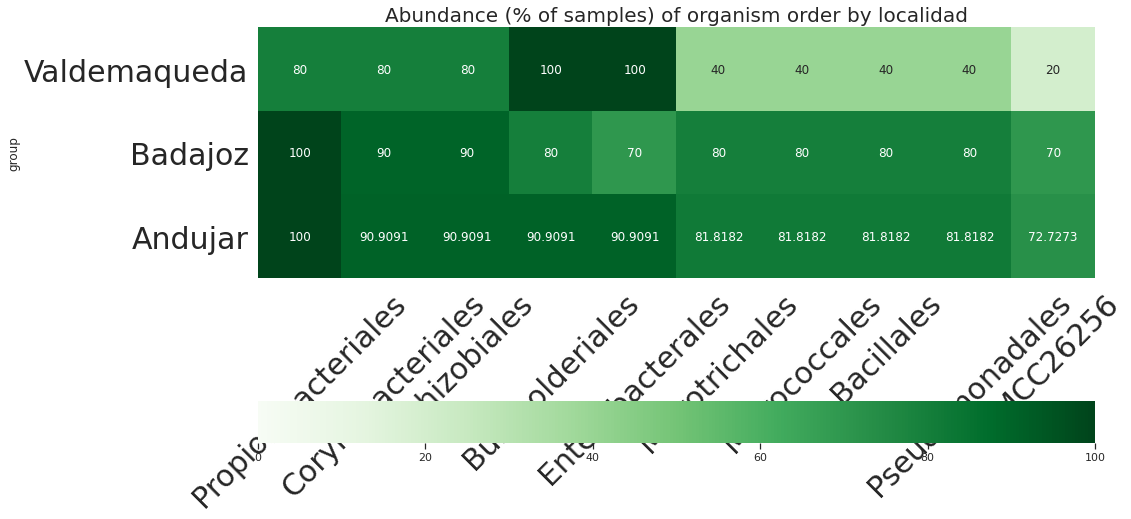

In [30]:
fig,ax = plt.subplots(figsize=(15,15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
ax.set_title(f"Abundance (% of samples) of organism {level} by {category}", fontdict={'fontsize' : 20})
ax.tick_params(labelsize=13)
sns.heatmap(df, annot=True, 
            cbar=True, 
            cmap="Greens", 
            vmax=100, 
            vmin=0, 
            fmt="g", 
            square=True, 
            ax=ax, 
            cbar_kws={
                "orientation" : "horizontal",
            }
           )
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.savefig(png_name)